In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.tokenize import word_tokenize
import warnings
import joblib
import re


In [2]:
# importing dataset
dataset_columns = ["target", "ids", "date", "flag", "user", "text"]
dataset_encode = "ISO-8859-1"
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = dataset_encode, names = dataset_columns)

In [2]:
pdf.__version__

NameError: name 'pdf' is not defined

In [3]:
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data.isnull().any()

target    False
ids       False
date      False
flag      False
user      False
text      False
dtype: bool

In [5]:
data['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [6]:
# changing target value from {0,4} to {0,1}

t = []
for i in data.target.values:
    if i ==0: t.append(0)
    else: t.append(1)
        
df = pd.DataFrame({"text":data.text.values, "target":t})
print("positive, negative :", set(df.target))

positive, negative : {0, 1}


In [7]:
df['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [8]:
# checking out the negative comments from the train set

df[df['target'] == 0].head(10)

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
5,@Kwesidei not the whole crew,0
6,Need a hug,0
7,@LOLTrish hey long time no see! Yes.. Rains a...,0
8,@Tatiana_K nope they didn't have it,0
9,@twittera que me muera ?,0


In [9]:
# checking out the postive comments from the train set 

df[df['target'] == 1].head(10)

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1
800005,@ProductOfFear You can tell him that I just bu...,1
800006,@r_keith_hill Thans for your response. Ihad al...,1
800007,"@KeepinUpWKris I am so jealous, hope you had a...",1
800008,"@tommcfly ah, congrats mr fletcher for finally...",1
800009,@e4VoIP I RESPONDED Stupid cat is helping me ...,1


<AxesSubplot:>

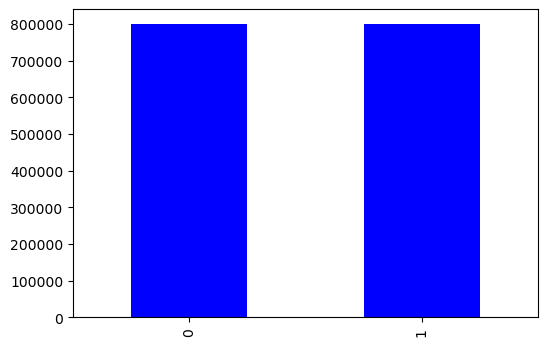

In [10]:
df['target'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

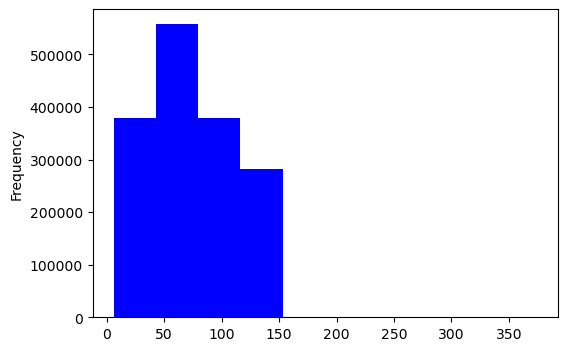

In [11]:
# checking the distribution of tweets in the data

length_train = df['text'].str.len().plot.hist(color = 'blue', figsize = (6, 4))
# length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

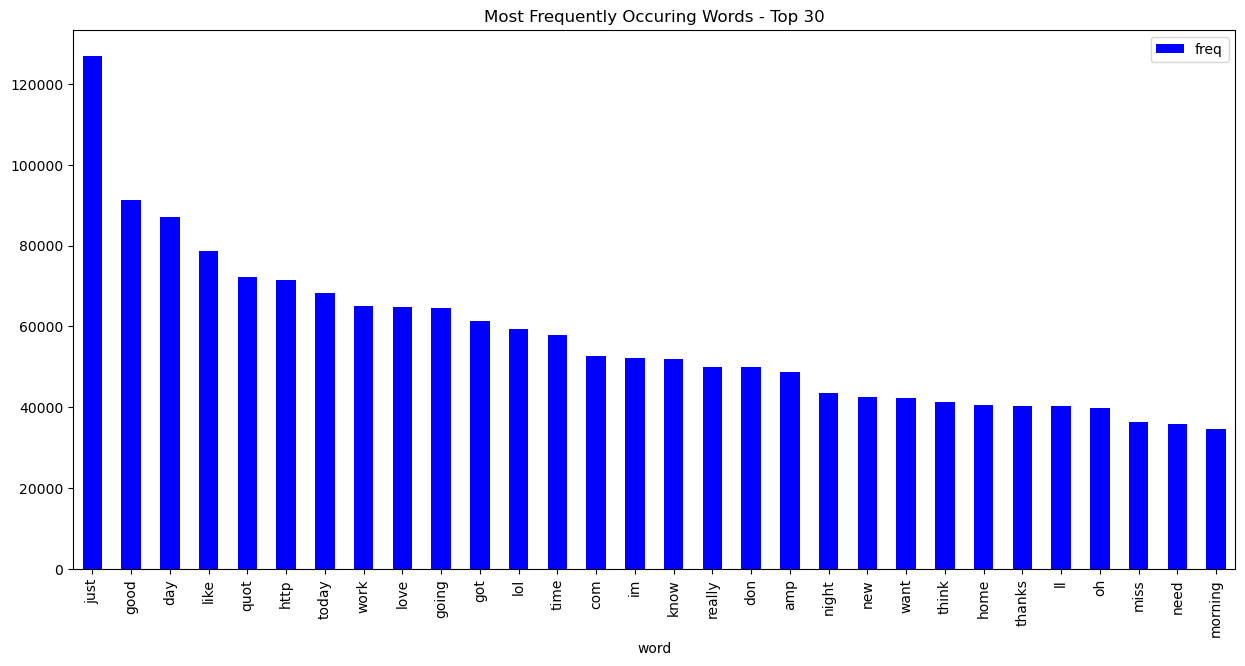

In [12]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [13]:
!pip install wordcloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

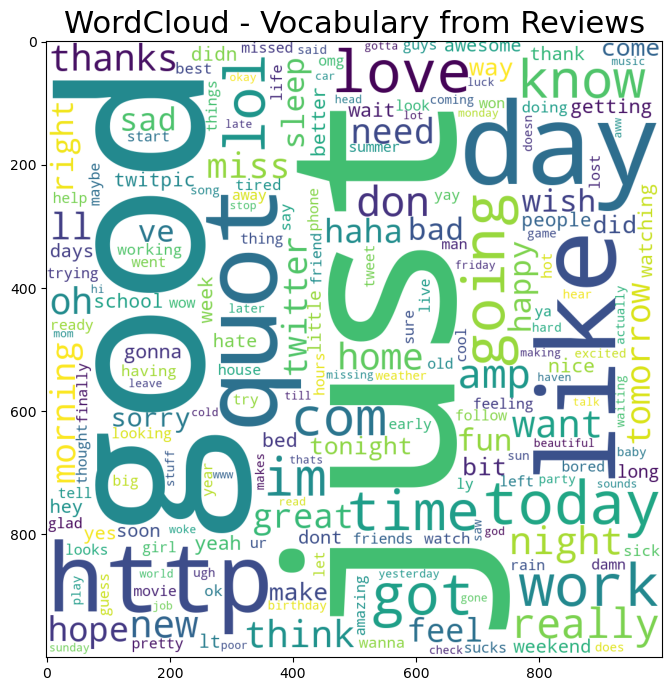

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [15]:
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [16]:
import re

In [17]:
# extracting hashtags from positive tweets
HT_regular = hashtag_extract(df['text'][df['target'] == 0])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(df['text'][df['target'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [18]:
import nltk

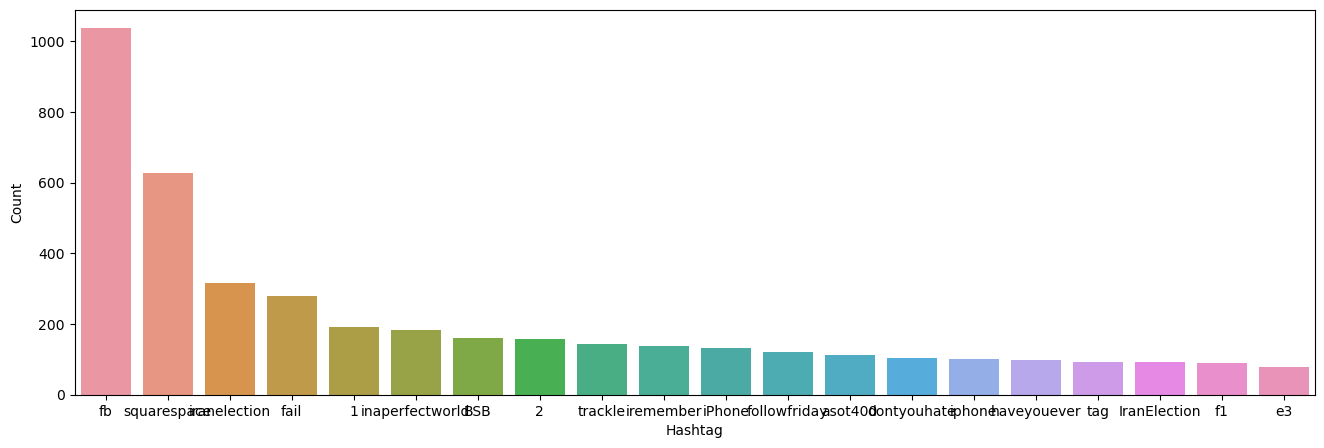

In [19]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

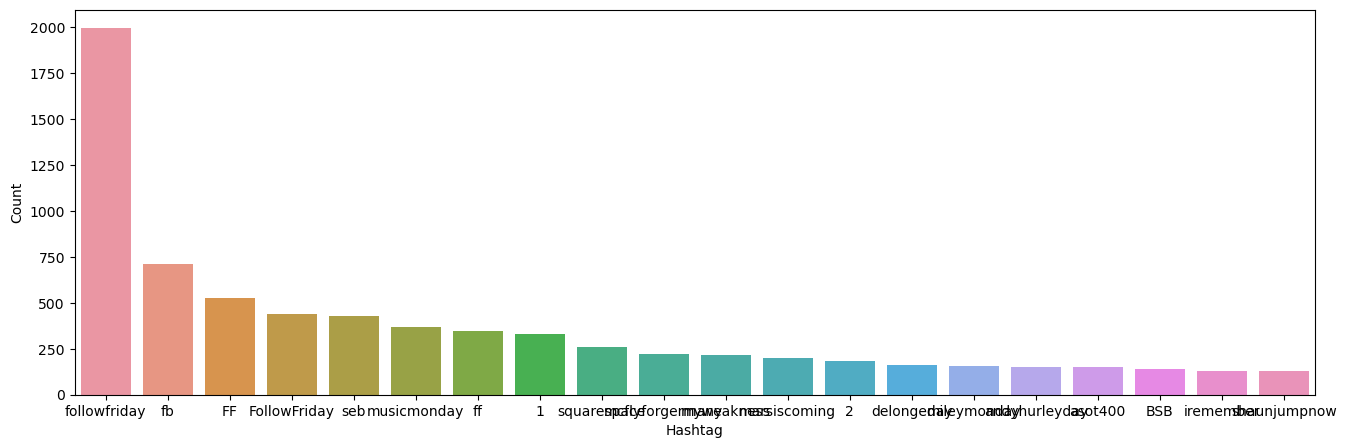

In [20]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [21]:
#remove punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['clean_text']=df['text'].apply(lambda x: remove_punctuation(x))
df.head()

,text,target,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,switchfoot httptwitpiccom2y1zl Awww thats a b...
1,is upset that he can't update his Facebook by ...,0,is upset that he cant update his Facebook by t...
2,@Kenichan I dived many times for the ball. Man...,0,Kenichan I dived many times for the ball Manag...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",0,nationwideclass no its not behaving at all im ...


In [22]:
import re
#remove hyperlink
df['clean_text'] = df['clean_text'].str.replace(r"http\S+", "") 
# #remove emoji
# data['clean_text'] = data['clean_text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#convert all words to lowercase
df['clean_text'] = df['clean_text'].str.lower()
df.head()

C:\Users\sande\AppData\Local\Temp\ipykernel_2680\339743526.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace(r"http\S+", "")


,text,target,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,switchfoot awww thats a bummer you shoulda ...
1,is upset that he can't update his Facebook by ...,0,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,0,kenichan i dived many times for the ball manag...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",0,nationwideclass no its not behaving at all im ...


In [23]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_numbers(x))
df['clean_text'].tail()

1599995    just woke up having no school is the best feel...
1599996    thewdbcom  very cool to hear old walt intervie...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy th birthday to my boo of alll time tupac...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: clean_text, dtype: object

## Stemming

In [24]:
# Stemming
import nltk
st = nltk.PorterStemmer()
df
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['clean_text']= df['clean_text'].apply(lambda x: stemming_on_text(x))
df['clean_text'].head()

0    switchfoot   awww thats a bummer  you shoulda ...
1    is upset that he cant update his facebook by t...
2    kenichan i dived many times for the ball manag...
3      my whole body feels itchy and like its on fire 
4    nationwideclass no its not behaving at all im ...
Name: clean_text, dtype: object

## Lematization

In [25]:
# lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['clean_text'] = df['clean_text'].apply(lambda x: lemmatizer_on_text(x))
df['clean_text'].head()

0    switchfoot   awww thats a bummer  you shoulda ...
1    is upset that he cant update his facebook by t...
2    kenichan i dived many times for the ball manag...
3      my whole body feels itchy and like its on fire 
4    nationwideclass no its not behaving at all im ...
Name: clean_text, dtype: object

In [26]:
# from gensim.models.doc2vec import Doc2Vec, TaggedDocumenT

In [27]:
# import tqdm

In [28]:
# sent_vectors = []


# for sent in tqdm(df['clean_text']): 
            
#             sent_vec = np.zeros(50)
            
#             cnt_words =0; 
            
#             for word in sent: 
                
#                 if word in w2v_words:
                    
#                     vec = w2v_model.wv[word]
                    
#                     sent_vec += vec
                    
#                     cnt_words += 1
                    
#             if cnt_words != 0:
                 
#                 sent_vec /= cnt_words
                
#             sent_vectors.append(sent_vec)


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_data, y_data = np.array(df['clean_text']), np.array(df['target'])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.05, random_state = 0)

In [31]:
from gensim.models import Word2Vec
Embed_dimensions = 100
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [37]:
%%time
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embed_dimensions,
                 workers=8)
print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 81774
Wall time: 1min 22s


In [38]:
input_length = 60

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
vocab_length = 
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 90000


In [40]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'translate'

In [36]:
embedding_matrix = np.zeros((vocab_length, Embed_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

IndexError: index 125934 is out of bounds for axis 0 with size 90000

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [ ]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [ ]:
training_model = getModel()
training_model.summary()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [ ]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=12,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

In [ ]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
# Predicting on the Test dataset.
y_pred = training_model.predict(X_test)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test)

In [ ]:
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred))

In [ ]:
# Saving Word2Vec-Model
word2vec_model.wv.save('Word2Vec-twitter-100')
word2vec_model.wv.save_word2vec_format('Word2Vec-twitter-100-trainable')

# Saving the tokenizer
with open('Tokenizer.pickle', 'wb') as file:
    pickle.dump(tokenizer, file)

# Saving the TF-Model.
training_model.save('Sentiment-BiLSTM')
training_model.save_weights("Model Weights/weights")

In [ ]:
from keras.preprocessing.text import one_hot 

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
sent = [' the glass ',]